# Mapa de COVID19 -datos del 26 de abril

Este es un tutorial para hacer hacer mapas de COVID19. Si quieres aprender a hacer mapas en R con tidyverse, te recomiendo el tutorial
del Dr. Patricio Esteves en https://github.com/prestevez/covid-19-mx-map/blob/master/new_map.R

In [1]:
#El primer paso para hacer un mapa es tener un archivo .shp con el que se pueda hacer georeferenciación de los datos
#que quieres mapear. Del tutorial del Dr. Esteves puedes encontrar uno muy bueno a nivel municipal en la la liga:
#https://github.com/prestevez/covid-19-mx-map/raw/master/datos_covid/01_32_mun.zip

#Cargamos el paquete
import geopandas as gpd


#https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0

In [2]:
#También cargamos matplotlib
import matplotlib.pyplot as plt

In [3]:
#Cargamos la dirección de nuestro shapefile. Es necesario que tengas todos los archivos de shapefile
#No basta con tener sólo el archivo cuya extensión .shp
shapefile = 'C:/Users/Ramiro Antonio/Dropbox/Otras cosas/COVID19/01_32_mun.shp'

#Luego leemos el shapefile con geopandas
geodf = gpd.read_file(shapefile)

In [4]:
#Exploramos el shapefile
geodf.head(3)

#Observamos que tenemos cinco columnas. CLave_Georefenciada (conformado por la concatenación de entidad y munc)
#Clave_entd, clave_mun, NomGEO y geometry (dato de polígono y coordenadas)


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,01001,01,001,Aguascalientes,"POLYGON ((2489072.503 1115771.584, 2489352.774..."
1,01002,01,002,Asientos,"POLYGON ((2494680.261 1141224.505, 2494749.948..."
2,01003,01,003,Calvillo,"POLYGON ((2429607.454 1120262.254, 2429071.902..."


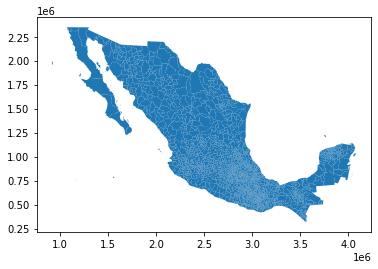

In [5]:
#Verificamos que sea un mapa. 
geodf.plot()

#Felicidades, tienes un mapa

In [6]:
#Ya tenemos nuestro shapefile. Ahora necesitamos el segundo archivo en donde está la info que queremos unir
import pandas as pd

#converter te ayuda a mantener los 0
df = pd.read_csv("C:/Users/Ramiro Antonio/Dropbox/Otras cosas/COVID19/200426COVID19MEXICO.csv",
                encoding='latin-1') #como tiene acentos, recuerda ponerle el encoding para que lea el csv

#Tip. En caso de que tuvieras la clave y empezara con cero, para que al subirla con python no se pierdan los "Leading zeros"
#usa este código
#df = pd.read_csv("C:/Users/Ramiro Antonio/Dropbox/Otras cosas/COVID19/200426COVID19MEXICO.csv",
#                encoding='latin-1', converters={'NOMBRE_VARIABLE': lambda x: str(x)}


#Nos interesa ver todas las columns, por lo que le decimos a los pandas que los muestren
pd.set_option('display.max_columns', 99)

In [7]:
df.head(4)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,26/04/2020,3.10E+58,1,4,9,2,9,9,16,2,17/04/2020,16/04/2020,9999-99-99,2,2,52,1,97,2,1,1,2,2,1,2,2,2,1,2,99,2,99,MÃ©xico,99,2
1,26/04/2020,0a9147,2,12,26,1,26,26,30,1,30/03/2020,18/03/2020,9999-99-99,97,2,32,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,99,MÃ©xico,99,97
2,26/04/2020,0f671b,2,12,5,2,5,5,30,1,09/04/2020,06/04/2020,9999-99-99,97,2,24,1,97,2,2,2,2,2,2,2,2,2,2,2,1,2,99,MÃ©xico,99,97
3,26/04/2020,15f384,2,12,25,1,25,2,5,2,06/04/2020,24/03/2020,9999-99-99,2,1,76,1,2,2,1,2,2,2,1,2,2,2,2,2,99,2,99,MÃ©xico,99,2


In [8]:
#Verficamos también la información contenida en el df
df.info()

#Tenemos un data frame con 67634 obs y 25 columnnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67635 entries, 0 to 67634
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   FECHA_ACTUALIZACION  67635 non-null  object
 1   ID_REGISTRO          67635 non-null  object
 2   ORIGEN               67635 non-null  int64 
 3   SECTOR               67635 non-null  int64 
 4   ENTIDAD_UM           67635 non-null  int64 
 5   SEXO                 67635 non-null  int64 
 6   ENTIDAD_NAC          67635 non-null  int64 
 7   ENTIDAD_RES          67635 non-null  int64 
 8   MUNICIPIO_RES        67635 non-null  int64 
 9   TIPO_PACIENTE        67635 non-null  int64 
 10  FECHA_INGRESO        67635 non-null  object
 11  FECHA_SINTOMAS       67635 non-null  object
 12  FECHA_DEF            67635 non-null  object
 13  INTUBADO             67635 non-null  int64 
 14  NEUMONIA             67635 non-null  int64 
 15  EDAD                 67635 non-null  int64 
 16  NACI

In [9]:
#Verificamos los null
df.isnull().sum()

#No hay valores nulos en nuestra base de datos. Muy bien Salud!

FECHA_ACTUALIZACION    0
ID_REGISTRO            0
ORIGEN                 0
SECTOR                 0
ENTIDAD_UM             0
SEXO                   0
ENTIDAD_NAC            0
ENTIDAD_RES            0
MUNICIPIO_RES          0
TIPO_PACIENTE          0
FECHA_INGRESO          0
FECHA_SINTOMAS         0
FECHA_DEF              0
INTUBADO               0
NEUMONIA               0
EDAD                   0
NACIONALIDAD           0
EMBARAZO               0
HABLA_LENGUA_INDIG     0
DIABETES               0
EPOC                   0
ASMA                   0
INMUSUPR               0
HIPERTENSION           0
OTRA_COM               0
CARDIOVASCULAR         0
OBESIDAD               0
RENAL_CRONICA          0
TABAQUISMO             0
OTRO_CASO              0
RESULTADO              0
MIGRANTE               0
PAIS_NACIONALIDAD      0
PAIS_ORIGEN            0
UCI                    0
dtype: int64

Mapa estático

In [10]:
#Unir los mapas de datos

#Hay que hacer una variable en la que coincida en ambos df
#En geodf está CVEGEO (clave estado + clave munip)

#Creamos una variable así en el df.
#Desde excel se puede hacer concatenando las variables de ENTIDAD_UM y MUNICIPIO_RES
#las cuales previamente se tuvieorn que haber pasado a un formato de =+TEXTO(J2,"00") para entidad
#y =+TEXTO(L2,"000") para municipio. lo explican en este link https://exceltotal.com/como-quitar-o-poner-ceros-la-izquierda-en-excel/

#Desde python tiene que seguirse el siguiente proceso:

# 1) Creas dos variables nuevas cambiando el formato a string y asegurándote que tengan 2 cifras en entidad y 3 en municp
df["CLAVE_ENTIDADNUEVA"] = [str("{:>02}".format(number)) for number in df.ENTIDAD_UM]
df["CLAVE_MUN_NUEVA"] = [str("{:>03}".format(number)) for number in df.MUNICIPIO_RES]

# 2) Concatenas ambas variables en una clave, que será la que unirás al geodf
df["CLAVE_2"] = df["CLAVE_ENTIDADNUEVA"] + df["CLAVE_MUN_NUEVA"] 
df.head(3)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,CLAVE_ENTIDADNUEVA,CLAVE_MUN_NUEVA,CLAVE_2
0,26/04/2020,3.10E+58,1,4,9,2,9,9,16,2,17/04/2020,16/04/2020,9999-99-99,2,2,52,1,97,2,1,1,2,2,1,2,2,2,1,2,99,2,99,MÃ©xico,99,2,09,016,09016
1,26/04/2020,0a9147,2,12,26,1,26,26,30,1,30/03/2020,18/03/2020,9999-99-99,97,2,32,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,99,MÃ©xico,99,97,26,030,26030
2,26/04/2020,0f671b,2,12,5,2,5,5,30,1,09/04/2020,06/04/2020,9999-99-99,97,2,24,1,97,2,2,2,2,2,2,2,2,2,2,2,1,2,99,MÃ©xico,99,97,05,030,05030


In [18]:
#Con esto ya tenemos una variable en df que se llama CLAVE_2 y una variable en geodf que se llama CVEGEO, las culaes uniremos
merged = geodf.merge(df, left_on = "CVEGEO", right_on = "CLAVE_2")
merged.tail()

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,CLAVE_ENTIDADNUEVA,CLAVE_MUN_NUEVA,CLAVE_2
64630,32057,32,057,Trancoso,"POLYGON ((2476976.320 1198274.003, 2476566.139...",26/04/2020,96981,1,4,32,2,32,32,57,1,22/04/2020,20/04/2020,9999-99-99,97,2,37,1,97,2,2,2,2,2,2,2,2,2,2,1,99,2,99,MÃ©xico,99,97,32,057,32057
64631,32057,32,057,Trancoso,"POLYGON ((2476976.320 1198274.003, 2476566.139...",26/04/2020,0dac96,1,6,32,1,14,32,57,1,20/04/2020,16/04/2020,9999-99-99,97,2,47,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,99,MÃ©xico,99,97,32,057,32057
64632,32057,32,057,Trancoso,"POLYGON ((2476976.320 1198274.003, 2476566.139...",26/04/2020,105c76,1,12,32,1,32,32,57,2,19/04/2020,17/04/2020,9999-99-99,2,1,23,1,2,2,2,2,2,2,1,2,2,1,2,2,99,2,99,MÃ©xico,99,2,32,057,32057
64633,32057,32,057,Trancoso,"POLYGON ((2476976.320 1198274.003, 2476566.139...",26/04/2020,0c7a71,1,4,32,2,32,32,57,1,22/04/2020,16/04/2020,9999-99-99,97,2,41,1,97,2,2,2,2,2,2,2,2,2,2,2,99,2,99,MÃ©xico,99,97,32,057,32057
64634,32058,32,058,Santa María de la Paz,"POLYGON ((2356749.002 1062854.583, 2357430.998...",26/04/2020,1ba218,1,99,32,2,32,32,58,2,31/03/2020,31/03/2020,31/03/2020,2,1,73,1,97,2,2,2,2,2,1,2,2,2,2,2,99,2,99,MÃ©xico,99,2,32,058,32058


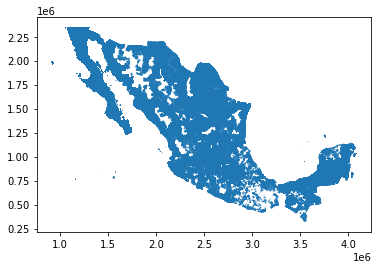

In [146]:
merged.plot()

In [131]:
#la base de datos anterior nos muestra los registros, a nosotros nos interesa el agregado de defunciones o fallecidos por
#municipio. Por lo anterior, hacemos una variable agregada

#Con esto obtenemos el total agregado
#merged.groupby("CLAVE_2").count()
merged_agg = merged.groupby(["CVEGEO", "CVE_ENT", "CVE_MUN", "NOMGEO"]).count().sort_values(by="ID_REGISTRO", ascending=False).reset_index()
merged_agg.drop("geometry", axis=1, inplace=True) #Tiramos geomtry para que no se repita después

merged_agg.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,CLAVE_ENTIDADNUEVA,CLAVE_MUN_NUEVA,CLAVE_2
0,09007,09,007,Iztapalapa,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925
1,09005,09,005,Gustavo A. Madero,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722
2,19039,19,039,Monterrey,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626
3,11020,11,020,León,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568
4,14039,14,039,Guadalajara,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395


In [132]:
#Al momento de agrupar se pierde la geometry, que es lo que nos permite hacer el mapa, por lo que lo rescatamos de la 
#base anterior la variable de geometry
geometry2 = pd.DataFrame(merged.geometry)
geometry2["CVEGEO"] = merged.CVEGEO

geometry2.head(2)

,geometry,CVEGEO
0,"POLYGON ((2489072.503 1115771.584, 2489352.774...",01001
1,"POLYGON ((2489072.503 1115771.584, 2489352.774...",01001


In [133]:
#Mergeamos
merged_agg2 = merged_agg.merge(geometry2, left_on = "CVEGEO", right_on = "CVEGEO")
merged_agg2

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,CLAVE_ENTIDADNUEVA,CLAVE_MUN_NUEVA,CLAVE_2,geometry
0,09007,09,007,Iztapalapa,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,"POLYGON ((2808094.185 825698.592, 2808093.949 ..."
1,09007,09,007,Iztapalapa,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,"POLYGON ((2808094.185 825698.592, 2808093.949 ..."
2,09007,09,007,Iztapalapa,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,"POLYGON ((2808094.185 825698.592, 2808093.949 ..."
3,09007,09,007,Iztapalapa,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,"POLYGON ((2808094.185 825698.592, 2808093.949 ..."
4,09007,09,007,Iztapalapa,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,"POLYGON ((2808094.185 825698.592, 2808093.949 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64630,28020,28,020,Mainero,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,"POLYGON ((2759370.152 1412926.283, 2759378.491..."
64631,19014,19,014,Doctor Arroyo,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,"POLYGON ((2683107.191 1359628.147, 2683114.608..."
64632,19015,19,015,Doctor Coss,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,"POLYGON ((2797152.628 1563463.898, 2798075.575..."
64633,19016,19,016,Doctor González,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,"POLYGON ((2719093.348 1550411.102, 2719108.202..."


In [116]:
#Está repitiendo 1925 veces iztapalapa, porque originalmente tenía 192 observaciones para esa alcadía
merged_agg2["NOMGEO"].value_counts()

Iztapalapa                    1925
Gustavo A. Madero             1722
Benito Juárez                 1706
Monterrey                     1626
León                          1568
                              ... 
Timilpan                         1
Santa María de los Ángeles       1
Cuzamá                           1
Jitotol                          1
Mixistlán de la Reforma          1
Name: NOMGEO, Length: 1463, dtype: int64

In [137]:
#Duplicado 
df_mapa = merged_agg2.drop_duplicates('CVEGEO')

#Verificamos que sólo haya una obs por CVEGEO
df_mapa.CVEGEO.value_counts()

#Vemos el head
df_mapa.head()

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,CLAVE_ENTIDADNUEVA,CLAVE_MUN_NUEVA,CLAVE_2,geometry
0,09007,09,007,Iztapalapa,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,1925,"POLYGON ((2808094.185 825698.592, 2808093.949 ..."
1925,09005,09,005,Gustavo A. Madero,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,1722,"POLYGON ((2801415.964 846522.857, 2801355.341 ..."
3647,19039,19,039,Monterrey,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,1626,"POLYGON ((2661977.852 1528091.192, 2661983.542..."
5273,11020,11,020,León,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,1568,"POLYGON ((2536980.424 1035269.394, 2537058.456..."
6841,14039,14,039,Guadalajara,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,1395,"POLYGON ((2364489.800 971730.559, 2364565.300 ..."


AttributeError: 'Line2D' object has no property 'column'

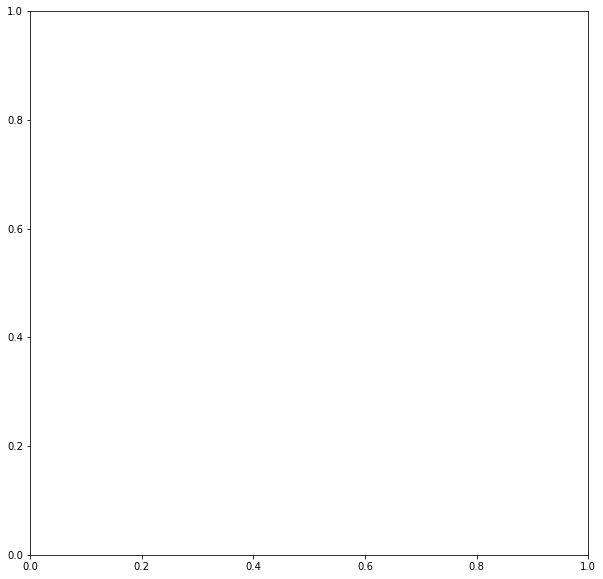

In [138]:
#Estamos listos para hacer el mapa

#variable
variable = "ID_REGISTRO"  #aqui la variable no cuenta tanto porque es un conteo agrupado que te da el total de enfermos,
#podemos usar cualquier variable

#set the range
vmin, vmax = 0, 2000

#create figure and axes
fig, ax = plt.subplots(1, figsize=(10, 10))

#create map
df_mapa.plot(column=variable, cmap="Blues", linewidth=0.8, ax=ax, edgecolor="0.8")

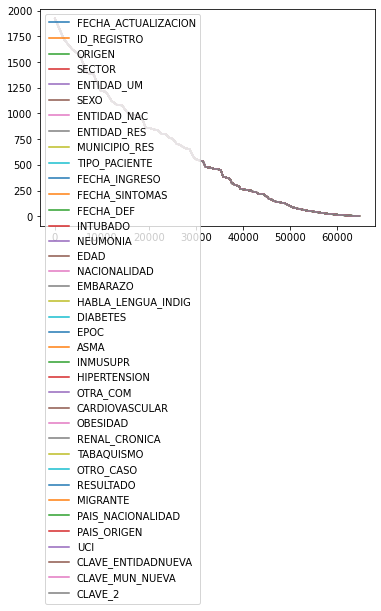

In [145]:
df_mapa.plot()

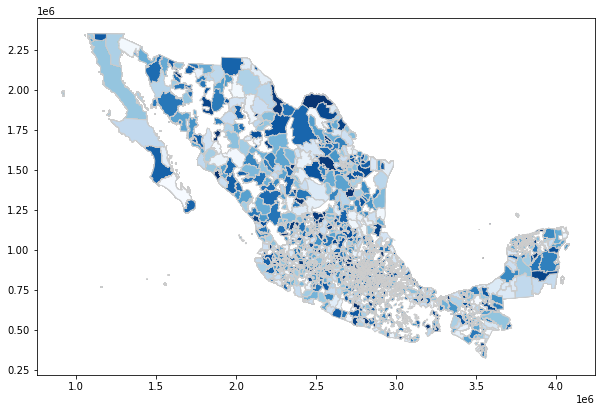

In [93]:
#MAPA NO BUENO

#variable
variable = "ID_REGISTRO"

#set the range
vmin, vmax = 0, 2000

#create figure and axes
fig, ax = plt.subplots(1, figsize=(10, 10))

#create map
merged.plot(column=variable, cmap="Blues", linewidth=0.8, ax=ax, edgecolor="0.8")